# Unsupervised Learning - K Means Clustering
---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

---
## Unsupervised classification using K-means on 2-Dimensional data
### Load and preview our unclassified data

In [4]:
datafile = loadmat('machine-learning-ex7/ex7/ex7data1.mat', struct_as_record=False)

X = datafile['X']

print("The shape of X is: {}".format(X.shape))

The shape of X is: (50, 2)


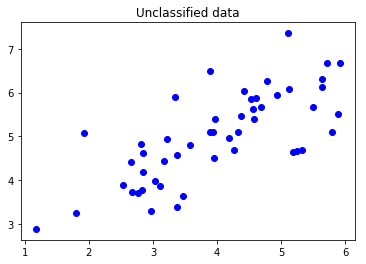

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o')
plt.title("Unclassified data")
plt.show()

---
### Create a K means clustering model to automatically group our data

For initial centroid creation, we shall choose randomised co-ordinates for each centroid based on the training data co-ordinates our model uses. This tends to give more effective K-means results when compared to completely randomised values for each centroid.

For cluster assignment in our algorithm, we assign every training example $ x^{(i)} $ to the nearest centroid like so:

$ c^{(i)} := j $ that minimises $ \parallel x^{(i)} - \mu_{j} \parallel ^{2} $

We then update the co-ordinates of our centroids. The mean of all data points allocated to a given centroid is used as the new value for the location of that centroid, like so:

$ u_{(k)} := \frac{1}{C_{k}} \sum_{i\in C_k} x^{(i)} $

In [6]:
def K_means(K, X, iterations=10, print_progress=False):
    
    m = X.shape[0]
    
    # randomly initialise K centroids
    K_centroids = cluster_initialise(X, K, m)
    
    K_history = np.copy(K_centroids)
    costs = []
    
    for iteration in range(iterations):
        # assign each data point to the closest centroid
        idx = find_closest_centroids(X, K_centroids, m)
        
        cost = compute_cost(X, K_centroids, idx)
        costs.append(cost)
    
        # move centroids to the means of points allocated to each
        K_centroids = compute_means(X, K_centroids, idx)
        
        # store historic K centroid values over iterations
        K_history = np.append(K_history, K_centroids, axis=0)
        
        if print_progress:
            print("Iteration {0}: Centroid values are {1}".format(iteration, K_centroids))
        
    return K_centroids, idx, K_history, costs
    
        
def cluster_initialise(X, K, m):
    K_1 = [np.random.choice(X[:, 0]) for i in range(K)]
    K_2 = [np.random.choice(X[:, 1]) for i in range(K)]
    K_centroids = np.column_stack((K_1, K_2))
    return K_centroids


def find_closest_centroids(X, K_centroids, m):
    indexes = []
    for i in range(m):
        k_dists = np.linalg.norm(X[i] - K_centroids, axis=1)**2
        closest_k = np.argmin(k_dists)
        indexes.append(closest_k)
    indexes = np.array(indexes)
    return indexes


def compute_means(X, K_centroids, idx):
    centroids = np.copy(K_centroids)
    for i in range(centroids.shape[0]):
        if X[idx==i].shape[0] > 0:
            centroids[i] = X[idx==i].sum(axis=0) / (X[idx==i].shape[0])
    return centroids


def compute_cost(X, K_centroids, idx):
    cost_sum = 0
    for i in range(X.shape[0]):
        cost_sum += np.linalg.norm(X[i] - K_centroids[idx[i]])**2
    cost = cost_sum / float(X.shape[0])
    return cost

In [7]:
centroids, idx, centroid_history, costs = K_means(2, X, 10, print_progress=True)

Iteration 0: Centroid values are [[3.70810086 4.65435681]
 [5.11392296 6.396602  ]]
Iteration 1: Centroid values are [[3.38098768 4.42015064]
 [5.07064769 6.03863734]]
Iteration 2: Centroid values are [[3.14506134 4.35696128]
 [5.06370667 5.82478985]]
Iteration 3: Centroid values are [[3.06797847 4.2875413 ]
 [4.98732599 5.77767578]]
Iteration 4: Centroid values are [[3.02302986 4.26085521]
 [4.95550071 5.74475649]]
Iteration 5: Centroid values are [[2.9109159  4.12911324]
 [4.8365398  5.68927862]]
Iteration 6: Centroid values are [[2.86434884 4.08286312]
 [4.80385995 5.66897128]]
Iteration 7: Centroid values are [[2.86434884 4.08286312]
 [4.80385995 5.66897128]]
Iteration 8: Centroid values are [[2.86434884 4.08286312]
 [4.80385995 5.66897128]]
Iteration 9: Centroid values are [[2.86434884 4.08286312]
 [4.80385995 5.66897128]]


### Plot our results, including centroid locations and their path over successive iterations

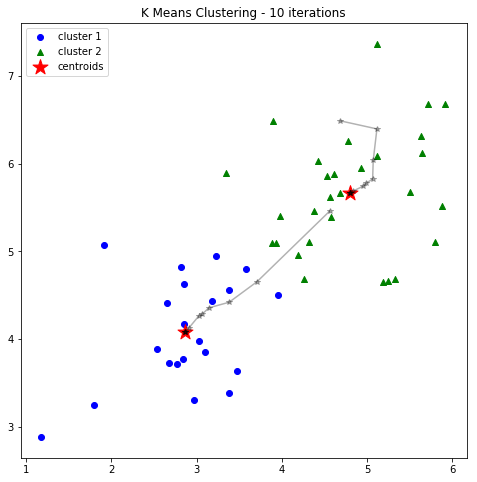

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[idx==0, 0], X[idx==0, 1], c='b', marker='o', label='cluster 1')
plt.scatter(X[idx==1, 0], X[idx==1, 1], c='g', marker='^', label='cluster 2')
plt.plot(centroid_history[::2, 0], centroid_history[::2, 1], c='black', alpha=0.3, marker='*')
plt.plot(centroid_history[1::2, 0], centroid_history[1::2, 1], c='black', alpha=0.3, marker='*')
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='r', marker='*', label='centroids')
plt.title("K Means Clustering - 10 iterations")
plt.legend(loc='upper left')
plt.show()

Plot our cost over training iterations

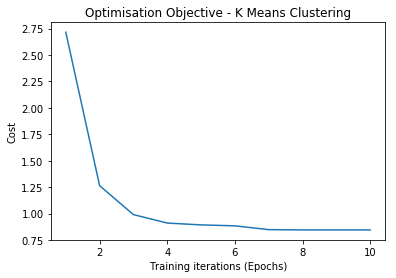

In [9]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.title("Optimisation Objective - K Means Clustering")
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

---
### Three clusters dataset

In [10]:
datafile = loadmat('machine-learning-ex7/ex7/ex7data2.mat', struct_as_record=False)

X = datafile['X']

print("The shape of X is: {}".format(X.shape))

The shape of X is: (300, 2)


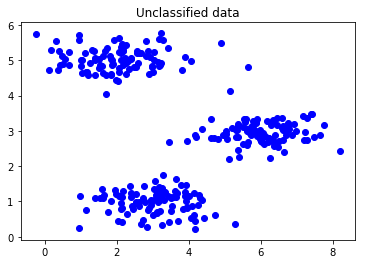

In [11]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o')
plt.title("Unclassified data")
plt.show()

#### Try our model again, this time with K = 3

In [12]:
centroids, idx, centroid_history, costs = K_means(3, X, 10, print_progress=True)

Iteration 0: Centroid values are [[6.00748373 3.06107085]
 [1.89363308 5.03870849]
 [3.0529077  1.07927128]]
Iteration 1: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 2: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 3: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 4: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 5: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 6: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 7: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 8: Centroid values are [[6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
Iteration 9: Centro

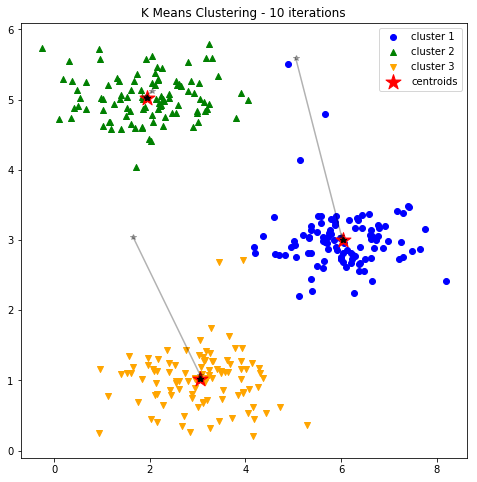

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(X[idx==0, 0], X[idx==0, 1], c='b', marker='o', label='cluster 1')
plt.scatter(X[idx==1, 0], X[idx==1, 1], c='g', marker='^', label='cluster 2')
plt.scatter(X[idx==2, 0], X[idx==2, 1], c='orange', marker='v', label='cluster 3')
plt.plot(centroid_history[::3, 0], centroid_history[::3, 1], c='black', alpha=0.3, marker='*')
plt.plot(centroid_history[1::3, 0], centroid_history[1::3, 1], c='black', alpha=0.3, marker='*')
plt.plot(centroid_history[2::3, 0], centroid_history[2::3, 1], c='black', alpha=0.3, marker='*')
plt.scatter(centroids[:, 0], centroids[:, 1], s=250, c='r', marker='*', label='centroids')
plt.title("K Means Clustering - 10 iterations")
plt.legend(loc='upper right')
plt.show()

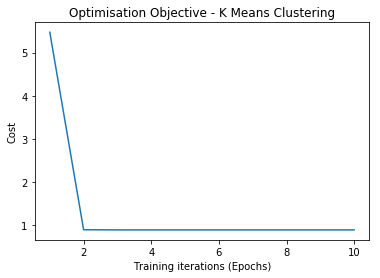

In [14]:
plt.figure()
plt.plot(range(1, len(costs) + 1), costs)
plt.title("Optimisation Objective - K Means Clustering")
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

#### Rough working for building our initial k-means models

In [15]:
# generation of initial values for centroids with a dataset X
X = np.random.choice(50, (50, 2))
K_1 = [np.random.choice(X[:, 0]) for i in range(2)]
K_2 = [np.random.choice(X[:, 1]) for i in range(2)]
K = np.column_stack((K_1, K_2))
print(K)

[[37 13]
 [44 42]]


In [16]:
historic_K = np.append([K], [K], axis=0)
print(historic_K[0])

[[37 13]
 [44 42]]


In [17]:
# assignment of data to closest centroid indexes
print(X[0])
print(K)
print(X[0] - K)
print((np.linalg.norm(X[0] - K, axis=1))**2)

[38  4]
[[37 13]
 [44 42]]
[[  1  -9]
 [ -6 -38]]
[  82. 1480.]


In [18]:
# assignment of closest centroid indexes for each data point
indexes = []
for i in range(X.shape[0]):
    centroid_distances = (np.linalg.norm((X[i] - K), axis=1)**2)
    closest_centroid = np.argmin(centroid_distances)
    indexes.append(closest_centroid)
indexes = np.array(indexes)
print(indexes)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 1 1 0 1 1 1]


In [19]:
# working out the mean and subsequent new values for our centroids
for i, centroid in enumerate(K):
    print(i, centroid)
    print(X[indexes==i].sum(axis=0))
    print(X[indexes==i].shape[0])
    print(X[indexes==i].sum(axis=0) / X[indexes==i].shape[0])

(0, array([37, 13]))
[741 400]
29
[25 13]
(1, array([44, 42]))
[535 855]
21
[25 40]


In [20]:
# updating centroid values to new mean value of assigned points
for i, centroid in enumerate(K):
    print(i, centroid)
    centroid = X[indexes==i].sum(axis=0) / (X[indexes==i].shape[0])
    print("new centroid is {}".format(centroid))

(0, array([37, 13]))
new centroid is [25 13]
(1, array([44, 42]))
new centroid is [25 40]


In [21]:
# outputing the correct values of centroid history for plotting on our graph
print(centroid_history[:, 0].shape)
print(centroid_history[:, 1].shape)
print(centroid_history)
print(centroid_history[::2, 0])
print(centroid_history[1::2, 0])

(33,)
(33,)
[[5.05274526 5.59205535]
 [2.04974595 5.11526323]
 [1.65456309 3.03928694]
 [6.00748373 3.06107085]
 [1.89363308 5.03870849]
 [3.0529077  1.07927128]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]
 [1.95399466 5.02557006]
 [3.04367119 1.01541041]]
[5.05274526 1.65456309 1.89363308 6.03366736 3.04367119 1.95399466
 6.03366736 3.04367119 1.95399466 6.03366736 3.04367119 1.95399466
 6.03366736 3.04367119 1.953

---
## Image compression on multi-dimensional data using our K-means algorithm

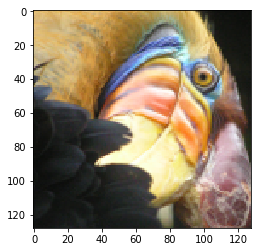

In [22]:
bird_img = plt.imread('machine-learning-ex7/ex7/bird_small.png')
plt.imshow(bird_img)
plt.show()

This parrot image will serve as a good example for image reduction using our K-Means model.

In [23]:
datafile = loadmat('machine-learning-ex7/ex7/bird_small.mat', struct_as_record=False)

X = datafile['A']

print("The shape of X is: {}".format(X.shape))

The shape of X is: (128, 128, 3)


The first two dimensions identify the pixel location on the image, whilst the third dimension represents red, green or blue (integer value from 0-255).

To make data compression possible, we need to flatten the first two dimensions, so that we have data with shape (128*128, 3) = (16384, 3). This gives us 16384 data points that represent a pixel colour. 

In [24]:
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

print("The new shape of X is: {}".format(X.shape))

The new shape of X is: (16384, 3)


In [25]:
print("First data point in X has RGB values: {}.".format(X[0]))

First data point in X has RGB values: [219 180 103].


Visualise our image data in 3-D

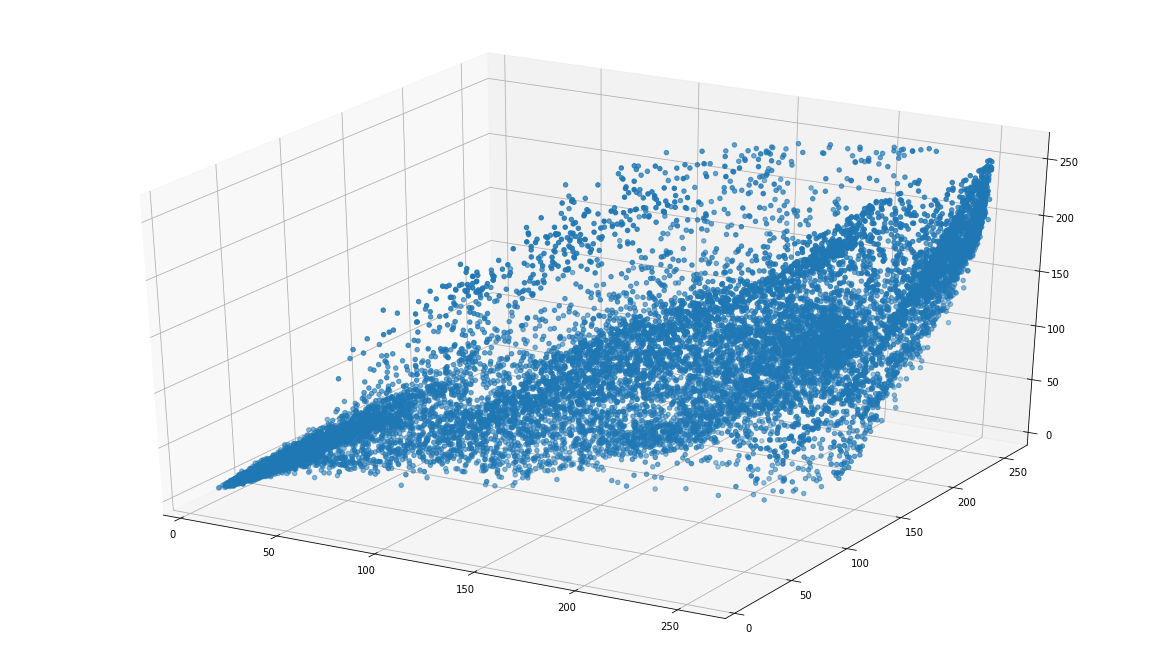

In [28]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

We will use K Means to select the 16 colours that will be used to represent the image after compression. In essence, what we are doing is finding the best 16 groups (clusters) of colour in the image data.

Before we do this however, we need to upgrade the K Means model so that it supports 3-Dimensional input data.

In [95]:
def K_means(K, X, iterations=10, print_progress=False):
    
    m = X.shape[0]
    
    # randomly initialise K centroids
    K_centroids = cluster_initialise(X, K, m)
    
    K_history = np.copy(K_centroids)
    costs = []
    
    for iteration in range(iterations):
        # assign each data point to the closest centroid
        idx = find_closest_centroids(X, K_centroids, m)
        
        # calculate optimisation objective
        cost = compute_cost(X, K_centroids, idx)
        costs.append(cost)
    
        # move centroids to the means of points allocated to each
        K_centroids = compute_means(X, K_centroids, idx)
        
        # store historic K centroid values over iterations
        K_history = np.append(K_history, K_centroids, axis=0)
        
        if print_progress:
            print("Iteration {0}: Centroid values are {1}".format(iteration, K_centroids))
            print("Cost is: {0}".format(cost))
        
    return K_centroids, idx, K_history, costs
    
        
def cluster_initialise(X, K, m):
    K_centroids = [np.random.choice(X[:, 0]) for k in range(K)]
    
    for i in range(1, X.shape[1]):
        K_ = [np.random.choice(X[:, i]) for k in range(K)]
        K_centroids = np.column_stack((K_centroids, K_))
    return K_centroids


def find_closest_centroids(X, K_centroids, m):
    indexes = []
    for i in range(m):
        k_dists = np.linalg.norm(X[i] - K_centroids, axis=1)**2
        closest_k = np.argmin(k_dists)
        indexes.append(closest_k)
    indexes = np.array(indexes)
    return indexes


def compute_means(X, K_centroids, idx):
    centroids = np.copy(K_centroids)
    for i in range(centroids.shape[0]):
        if X[idx==i].shape[0] > 0:
            centroids[i] = X[idx==i].sum(axis=0) / (X[idx==i].shape[0])
    return centroids


def compute_cost(X, K_centroids, idx):
    cost_sum = 0
    for i in range(X.shape[0]):
        cost_sum += np.linalg.norm(X[i] - K_centroids[idx[i]])**2
    cost = cost_sum / float(X.shape[0])
    return cost

#### 16 Clusters

In [204]:
centroids, idx, centroid_history, cost = K_means(16, X, 300, print_progress=True)

Iteration 0: Centroid values are [[208 187 130]
 [243 229 199]
 [102  99 117]
 [165 191 197]
 [196 168 163]
 [171 128  61]
 [107  86  73]
 [103  87  74]
 [ 32  34  29]
 [228 189 113]
 [ 34  35  34]
 [240 210 154]
 [195 134 107]
 [178 150 117]
 [172 140 112]
 [222 152  98]]
Cost is: 14128.3649902
Iteration 1: Centroid values are [[230 202 153]
 [ 57  56  48]
 [145 145 153]
 [207 214 216]
 [221 189 181]
 [203 157  87]
 [145 116  95]
 [115 109  91]
 [ 63  51  32]
 [243 213 135]
 [ 92  76  60]
 [250 233 182]
 [211 168 105]
 [200 174 134]
 [181 156 131]
 [234 182 117]]
Cost is: 6737.28308105
Iteration 2: Centroid values are [[246 226 174]
 [ 85  78  77]
 [178 176 165]
 [232 198 163]
 [244 215 194]
 [218 174 103]
 [178 149 118]
 [142 135 132]
 [144 100  45]
 [247 233 156]
 [160 125  85]
 [ 59  58  49]
 [223 186 117]
 [215 192 170]
 [195 174 160]
 [243 203 142]]
Cost is: 8763.88903809
Iteration 3: Centroid values are [[251 242 187]
 [125 113 107]
 [192 195 181]
 [246 216 182]
 [ 58  56  48]
 

Iteration 28: Centroid values are [[171 139 100]
 [111  91  70]
 [224 206 186]
 [253 236 179]
 [249 227 187]
 [ 48  45  37]
 [250 224 184]
 [246 221 170]
 [250 240 193]
 [248 236 173]
 [235 201 128]
 [216 189 171]
 [250 242 184]
 [249 220 203]
 [192 167 133]
 [247 243 203]]
Cost is: 9103.06225586
Iteration 29: Centroid values are [[208 175 123]
 [168 140 107]
 [236 213 193]
 [240 231 181]
 [251 232 194]
 [112  90  66]
 [253 227 191]
 [249 234 183]
 [253 246 197]
 [246 237 181]
 [245 224 151]
 [233 206 183]
 [227 224 189]
 [240 231 222]
 [217 190 162]
 [ 51  49  41]]
Cost is: 8815.34289551
Iteration 30: Centroid values are [[228 200 150]
 [203 175 135]
 [240 220 204]
 [246 235 189]
 [252 247 205]
 [173 142 104]
 [226 228 219]
 [252 244 192]
 [164 140  98]
 [246 240 189]
 [249 237 168]
 [241 214 191]
 [234 177 125]
 [ 38  38  34]
 [234 207 181]
 [109  90  69]]
Cost is: 8970.8661499
Iteration 31: Centroid values are [[243 222 170]
 [216 196 177]
 [239 228 216]
 [249 237 199]
 [ 46  45  38

Iteration 56: Centroid values are [[246 223 176]
 [251 241 186]
 [242 221 198]
 [113  91  69]
 [246 236 178]
 [250 230 188]
 [169 138 103]
 [248 230 211]
 [239 167 101]
 [234 209 178]
 [239 188 115]
 [ 49  47  39]
 [216 182 115]
 [226 199 152]
 [243 239 199]
 [187 168 144]]
Cost is: 8736.39569092
Iteration 57: Centroid values are [[252 231 183]
 [224 224 195]
 [240 227 212]
 [171 141 105]
 [246 237 183]
 [251 237 195]
 [201 171 126]
 [ 45  44  38]
 [245 182 123]
 [240 216 190]
 [245 212 145]
 [112  90  68]
 [226 195 130]
 [242 220 171]
 [251 227 173]
 [211 192 181]]
Cost is: 8843.11047363
Iteration 58: Centroid values are [[238 233 204]
 [232 165 107]
 [ 39  39  35]
 [206 175 129]
 [247 241 191]
 [177 158 119]
 [215 188 156]
 [106  87  66]
 [224 195 166]
 [240 223 205]
 [248 229 165]
 [172 141 105]
 [241 216 154]
 [247 235 177]
 [249 238 180]
 [231 205 188]]
Cost is: 9146.73876953
Iteration 59: Centroid values are [[ 43  44  39]
 [242 195 128]
 [ 98  80  61]
 [226 200 155]
 [189 168 12

Iteration 84: Centroid values are [[220 208 162]
 [252 241 180]
 [248 234 173]
 [251 227 183]
 [247 222 176]
 [243 216 166]
 [248 241 190]
 [ 46  44  37]
 [231 205 184]
 [171 140 104]
 [115  94  72]
 [249 239 165]
 [207 177 130]
 [227 200 164]
 [235 227 213]
 [246 216 189]]
Cost is: 9512.33825684
Iteration 85: Centroid values are [[234 221 175]
 [191 196 192]
 [250 240 179]
 [235 231 201]
 [250 230 181]
 [247 232 175]
 [199 179 133]
 [111  90  66]
 [239 213 191]
 [207 177 131]
 [172 143 107]
 [190 190 170]
 [230 202 161]
 [244 207 180]
 [ 41  41  36]
 [240 224 206]]
Cost is: 9432.86175537
Iteration 86: Centroid values are [[243 227 177]
 [218 200 172]
 [193 177 133]
 [250 227 178]
 [236 233 198]
 [241 232 182]
 [209 187 171]
 [172 142 105]
 [250 220 198]
 [235 205 148]
 [208 177 129]
 [225 198 186]
 [244 222 173]
 [225 213 203]
 [101  83  64]
 [ 37  38  34]]
Cost is: 9429.87823486
Iteration 87: Centroid values are [[244 233 179]
 [234 207 180]
 [204 191 174]
 [229 219 183]
 [ 54  53  4

Iteration 112: Centroid values are [[248 235 191]
 [222 216 173]
 [240 218 205]
 [196 158 104]
 [210 182 129]
 [242 211 155]
 [204 184 129]
 [203 169 123]
 [249 230 176]
 [146 125 107]
 [244 219 171]
 [212 185 157]
 [231 206 162]
 [ 52  51  44]
 [102  83  61]
 [234 206 185]]
Cost is: 8682.63525391
Iteration 113: Centroid values are [[ 62  59  47]
 [232 216 183]
 [ 71  67  62]
 [216 181 121]
 [233 206 144]
 [248 229 165]
 [207 195 171]
 [221 185 143]
 [252 241 184]
 [177 159 140]
 [249 234 182]
 [227 200 187]
 [242 215 172]
 [105  87  69]
 [169 136  96]
 [247 217 194]]
Cost is: 10000.0865479
Iteration 114: Centroid values are [[128  97  58]
 [241 220 185]
 [116  99  89]
 [231 199 135]
 [244 224 160]
 [251 239 175]
 [226 202 184]
 [233 198 166]
 [ 58  54  45]
 [205 182 166]
 [250 238 187]
 [229 207 191]
 [247 226 182]
 [163 135 104]
 [207 171 116]
 [243 230 216]]
Cost is: 10663.2675781
Iteration 115: Centroid values are [[197 149  80]
 [246 227 202]
 [151 133 114]
 [243 221 149]
 [248 23

Iteration 140: Centroid values are [[ 38  38  33]
 [238 208 183]
 [244 225 212]
 [102  83  64]
 [193 168 131]
 [210 188 135]
 [245 233 171]
 [228 196 131]
 [249 229 185]
 [246 176 105]
 [159 130  99]
 [223 199 178]
 [252 246 195]
 [248 228 186]
 [238 184 127]
 [247 238 184]]
Cost is: 8254.54547119
Iteration 141: Centroid values are [[ 96  79  60]
 [246 219 197]
 [ 36  36  33]
 [164 134 101]
 [210 185 164]
 [218 199 174]
 [237 229 178]
 [244 221 156]
 [252 232 187]
 [238 187 134]
 [201 171 124]
 [233 210 185]
 [ 93  87  68]
 [252 230 201]
 [229 195 163]
 [248 242 194]]
Cost is: 8558.52960205
Iteration 142: Centroid values are [[165 117  67]
 [244 228 208]
 [ 89  74  57]
 [203 172 127]
 [219 194 184]
 [227 207 178]
 [245 232 177]
 [248 235 168]
 [253 244 190]
 [241 217 152]
 [220 192 148]
 [242 213 193]
 [163 136 106]
 [ 33  34  30]
 [240 208 179]
 [218 201 154]]
Cost is: 8598.52148438
Iteration 143: Centroid values are [[204 157  89]
 [ 44  45  40]
 [139 120 105]
 [222 196 158]
 [219 20

Iteration 168: Centroid values are [[247 222 159]
 [246 220 199]
 [ 37  36  31]
 [226 202 194]
 [227 195 145]
 [147 124 107]
 [181 147 100]
 [244 233 172]
 [248 239 184]
 [181 167 152]
 [250 236 178]
 [242 223 175]
 [110  90  68]
 [253 227 205]
 [217 176 108]
 [ 92  86  70]]
Cost is: 8937.68426514
Iteration 169: Centroid values are [[245 233 167]
 [249 236 214]
 [ 97  78  58]
 [239 206 184]
 [244 216 167]
 [171 153 138]
 [208 173 120]
 [237 229 179]
 [251 239 189]
 [211 193 184]
 [243 234 180]
 [249 229 186]
 [169 138 100]
 [ 44  43  37]
 [233 197 127]
 [106 106 120]]
Cost is: 7885.57080078
Iteration 170: Centroid values are [[245 235 173]
 [ 45  43  37]
 [168 131  87]
 [251 218 199]
 [250 224 176]
 [196 179 164]
 [224 191 149]
 [242 213 163]
 [252 246 200]
 [227 210 194]
 [247 235 184]
 [248 238 203]
 [207 171 115]
 [ 96  79  62]
 [245 220 155]
 [148 146 150]]
Cost is: 7641.60552979
Iteration 171: Centroid values are [[245 235 179]
 [100  82  62]
 [205 167 110]
 [252 227 212]
 [252 22

Iteration 196: Centroid values are [[242 207 173]
 [227 205 185]
 [105  84  62]
 [169 140 106]
 [252 241 206]
 [231 225 183]
 [245 230 157]
 [ 40  39  33]
 [247 229 203]
 [245 220 193]
 [251 234 185]
 [231 179 137]
 [200 172 133]
 [223 191 129]
 [244 240 199]
 [224 194 172]]
Cost is: 8026.56115723
Iteration 197: Centroid values are [[241 215 193]
 [235 211 184]
 [170 139 102]
 [206 176 129]
 [ 45  45  38]
 [244 217 167]
 [241 232 172]
 [ 96  79  61]
 [246 235 223]
 [242 227 206]
 [246 239 191]
 [234 195 170]
 [214 192 174]
 [239 219 148]
 [248 233 185]
 [231 207 184]]
Cost is: 8611.43652344
Iteration 198: Centroid values are [[239 221 207]
 [244 211 179]
 [207 176 130]
 [228 199 157]
 [101  82  63]
 [249 230 174]
 [247 237 178]
 [165 135 102]
 [ 41  39  32]
 [247 240 211]
 [251 247 202]
 [234 205 186]
 [222 202 177]
 [245 232 158]
 [252 242 188]
 [229 204 184]]
Cost is: 8682.67346191
Iteration 199: Centroid values are [[242 219 193]
 [247 220 196]
 [228 201 162]
 [243 216 169]
 [166 13

Iteration 224: Centroid values are [[243 222 167]
 [216 178 109]
 [192 170 149]
 [246 212 172]
 [231 223 217]
 [160 133 105]
 [ 48  46  38]
 [234 208 179]
 [227 203 189]
 [103  84  64]
 [228 201 162]
 [246 240 192]
 [246 216 192]
 [246 237 181]
 [248 228 194]
 [242 232 181]]
Cost is: 8281.77020264
Iteration 225: Centroid values are [[249 236 175]
 [234 202 131]
 [218 194 183]
 [252 215 187]
 [ 36  36  32]
 [196 169 133]
 [105  86  65]
 [242 218 193]
 [232 209 180]
 [169 138 102]
 [243 218 171]
 [181 162 122]
 [244 221 205]
 [248 240 186]
 [249 232 208]
 [247 236 188]]
Cost is: 9374.94940186
Iteration 226: Centroid values are [[229 223 180]
 [245 223 156]
 [223 202 182]
 [225 220 208]
 [ 94  77  59]
 [219 191 166]
 [168 138 104]
 [249 226 203]
 [239 205 177]
 [206 171 119]
 [248 234 178]
 [210 184 138]
 [250 222 198]
 [244 238 194]
 [ 49  48  40]
 [249 242 200]]
Cost is: 8451.20343018
Iteration 227: Centroid values are [[246 232 188]
 [249 237 168]
 [229 209 182]
 [235 185 140]
 [165 13

Iteration 252: Centroid values are [[247 232 176]
 [100  82  64]
 [159 130  99]
 [ 54  52  42]
 [226 206 183]
 [252 243 192]
 [241 214 173]
 [220 193 162]
 [210 182 139]
 [244 225 143]
 [245 214 195]
 [252 235 184]
 [201 168 118]
 [248 221 148]
 [150 144 139]
 [247 231 177]]
Cost is: 9444.65423584
Iteration 253: Centroid values are [[250 229 165]
 [164 134 100]
 [203 167 111]
 [109  89  68]
 [239 213 192]
 [ 55  52  43]
 [248 228 182]
 [237 208 179]
 [228 202 167]
 [246 234 156]
 [251 231 213]
 [251 242 188]
 [220 190 139]
 [250 237 164]
 [186 173 160]
 [250 243 195]]
Cost is: 9403.45239258
Iteration 254: Centroid values are [[253 233 176]
 [197 167 126]
 [223 189 126]
 [167 138 104]
 [243 224 207]
 [116  93  70]
 [250 234 183]
 [244 218 185]
 [240 212 176]
 [248 238 169]
 [ 48  46  38]
 [253 245 191]
 [239 213 159]
 [247 237 175]
 [212 193 189]
 [240 229 189]]
Cost is: 8859.52258301
Iteration 255: Centroid values are [[253 238 179]
 [214 186 157]
 [242 212 154]
 [204 174 128]
 [ 53  5

Iteration 280: Centroid values are [[ 95  80  67]
 [247 230 190]
 [247 228 165]
 [ 44  44  37]
 [246 213 192]
 [250 228 201]
 [211 177 123]
 [240 234 189]
 [244 234 177]
 [171 137  99]
 [164 156 150]
 [231 229 196]
 [229 203 188]
 [226 196 143]
 [251 233 204]
 [180 131  66]]
Cost is: 6962.79260254
Iteration 281: Centroid values are [[143 125 114]
 [252 244 195]
 [248 236 172]
 [103  84  62]
 [242 220 205]
 [249 241 207]
 [227 197 155]
 [247 204 136]
 [248 238 182]
 [208 173 118]
 [197 184 173]
 [237 178 122]
 [235 211 194]
 [242 219 167]
 [ 50  49  41]
 [210 159  83]]
Cost is: 7890.66949463
Iteration 282: Centroid values are [[182 164 144]
 [239 237 200]
 [249 238 177]
 [166 134  98]
 [249 227 207]
 [ 51  48  40]
 [243 212 174]
 [249 229 153]
 [250 241 187]
 [220 190 137]
 [218 200 194]
 [237 207 149]
 [248 218 195]
 [248 233 178]
 [106  86  67]
 [226 180 106]]
Cost is: 8284.15197754
Iteration 283: Centroid values are [[208 188 175]
 [250 226 176]
 [247 238 182]
 [203 171 122]
 [ 42  4

In [205]:
X_reduced = np.copy(X)
# convert all data points so that their RGB value is equal to the assigned centroid
for i in range(centroids.shape[0]):
    X_reduced[idx==i] = centroids[i]

# ensure that we have 16 unique RGB colour combinations
np.unique(X_reduced, axis=0).shape

Visualise the clustering of this data in 3D

In [29]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=idx)
plt.show()

ValueError: Invalid RGBA argument: 1

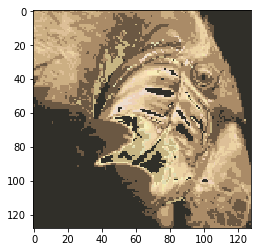

In [208]:
# reshape flattened image into (128, 128, 3) and visualise compressed image
X_reduced = X_reduced.reshape((128, 128, 3))

plt.imshow(X_reduced)
plt.show()

Not very good quality, but with more iterations and/or a greater number of clusters this would improve...

We can also visualise our optimisation function (cost) over successive iterations

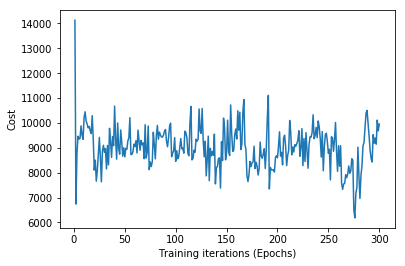

In [209]:
plt.figure()
plt.plot(range(1, len(cost) + 1), cost)
plt.ylabel("Cost")
plt.xlabel("Training iterations (Epochs)")
plt.show()

#### 56 Clusters

In [96]:
centroids, idx, centroid_history, cost = K_means(56, X, 200, print_progress=False)

Visualise our compressed image using 56 RGB colours (rather than original 256)

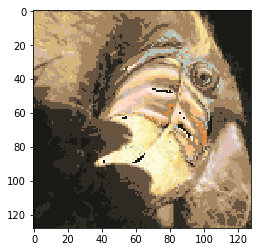

In [97]:
X_reduced = np.copy(X)
# convert all data points so that their RGB value is equal to the assigned centroid
for i in range(centroids.shape[0]):
    X_reduced[idx==i] = centroids[i]

# reshape flattened image into (128, 128, 3) and visualise compressed image
X_reduced = X_reduced.reshape((128, 128, 3))

plt.imshow(X_reduced)
plt.show()

Still poor performance, which could suggest there is a problem within our model. Despite this, the algorithms and use-case for K Means clustering models has been implemented in Python and explored. We can compare this to a well optimised and high-performance K Means algorithm from sklearn, as shown below.

---
### Use of Sklearn K Means model

In [98]:
from sklearn.cluster import KMeans

In [99]:
datafile = loadmat('machine-learning-ex7/ex7/bird_small.mat', struct_as_record=False)
X = datafile['A']
X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])

In [100]:
kmeans_model = KMeans(n_clusters=16)
kmeans_model = kmeans_model.fit(X)

In [101]:
# the indexes that each data sample belong to are stored in kmeans.labels_
idx = kmeans_model.labels_

# the centroid locations are stored in kmeans.cluster_centers_
centroids = kmeans_model.cluster_centers_

# confirm shapes of centroids and idx vars
print(centroids.shape)
print(np.unique(idx).shape)

(16, 3)
(16,)


#### Lets visualise these results

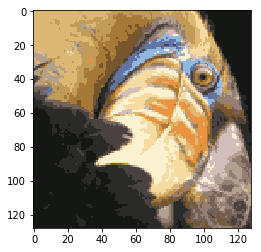

In [102]:
X_reduced = np.copy(X)
# convert all data points so that their RGB value is equal to the assigned centroid
for i in range(centroids.shape[0]):
    X_reduced[idx==i] = centroids[i]

# reshape flattened image into (128, 128, 3) and visualise compressed image
X_reduced = X_reduced.reshape((128, 128, 3))

plt.imshow(X_reduced)
plt.show()

The performance of this model is clearly much better than our custom K Means - although this is expected with the highly optimised sklearn library.